In [168]:
library(foreign)
library(ggfortify)
library(readr)
library(readxl)
library(lubridate)
library(forecast)
library(ggplot2)
library(model)

In [179]:
siniestrados <- read_excel('/home/taz/Documentos/git/Series/Siniestrados.xlsx')

In [180]:
head(siniestrados)

Año,Siniestros,Fallecidos,Lesionados_Graves,Lesionados_Menos_graves,Lesionados_Leves,Total_lesionados,Total_víctimas,Tasa_motorización,Vehículos_cada_100_habitantes,Parque_vehicular,Población,Indicadores_cada_10000_vehículos_Siniestralidad,Indicadores_cada_10000_vehículos_Mortalidad,Indicadores_cada_10000_vehículos_Morbilidad,Indicadores_cada_100000_habitantes_Siniestralidad,Indicadores_cada_100000_habitantes_Mortalidad,Indicadores_cada_100000_habitantes_Morbilidad,Fallecidos_cada_100_siniestros,Siniestros_por_cada_fallecido
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1972,26727,1792,6590,5624,11027,23241,25033,24.69888,4.048767,401114,9907065,666.3193,44.67558,579.4113,269.7772,18.088102,234.5902,6.704830,14.91462
1973,23480,1719,6020,5153,10079,21252,22971,24.11819,4.146249,417767,10075782,562.0358,41.14734,508.7046,233.0340,17.060711,210.9216,7.321124,13.65910
1974,18356,1269,4935,3763,7938,16636,17905,23.75966,4.208814,431172,10244501,425.7234,29.43141,385.8321,179.1791,12.387133,162.3896,6.913271,14.46493
1975,16602,1054,4208,3479,7142,14829,15883,23.36411,4.280069,445693,10413219,372.4986,23.64857,332.7178,159.4320,10.121750,142.4055,6.348633,15.75142
1976,17716,1079,4322,3456,7355,15133,16212,22.67017,4.411083,466049,10565409,380.1317,23.15207,324.7083,167.6793,10.212572,143.2316,6.090540,16.41891
1977,19638,1071,4566,4125,7961,16652,17723,20.84406,4.797529,514180,10717600,381.9285,20.82928,323.8555,183.2313,9.992909,155.3706,5.453712,18.33613


In [181]:
deaths <- read.table('/home/taz/Documentos/git/Series/deaths.txt', header=FALSE ,sep='')
head(deaths)
nV1 <- dmy(deaths$V1)

,V1,V2
,<fct>,<int>
1,01/01/1973,9007
2,01/02/1973,8106
3,01/03/1973,8928
4,01/04/1973,9137
5,01/05/1973,10017
6,01/06/1973,10826


In [187]:
nfecha1<- as.Date(as.character(deaths$V1),format="%d/%m/%Y")
print(nfecha1)

 [1] "1973-01-01" "1973-02-01" "1973-03-01" "1973-04-01" "1973-05-01"
 [6] "1973-06-01" "1973-07-01" "1973-08-01" "1973-09-01" "1973-10-01"
[11] "1973-11-01" "1973-12-01" "1974-01-01" "1974-02-01" "1974-03-01"
[16] "1974-04-01" "1974-05-01" "1974-06-01" "1974-07-01" "1974-08-01"
[21] "1974-09-01" "1974-10-01" "1974-11-01" "1974-12-01" "1975-01-01"
[26] "1975-02-01" "1975-03-01" "1975-04-01" "1975-05-01" "1975-06-01"
[31] "1975-07-01" "1975-08-01" "1975-09-01" "1975-10-01" "1975-11-01"
[36] "1975-12-01" "1976-01-01" "1976-02-01" "1976-03-01" "1976-04-01"
[41] "1976-05-01" "1976-06-01" "1976-07-01" "1976-08-01" "1976-09-01"
[46] "1976-10-01" "1976-11-01" "1976-12-01" "1977-01-01" "1977-02-01"
[51] "1977-03-01" "1977-04-01" "1977-05-01" "1977-06-01" "1977-07-01"
[56] "1977-08-01" "1977-09-01" "1977-10-01" "1977-11-01" "1977-12-01"
[61] "1978-01-01" "1978-02-01" "1978-03-01" "1978-04-01" "1978-05-01"
[66] "1978-06-01" "1978-07-01" "1978-08-01" "1978-09-01" "1978-10-01"
[71] "1978-11-01" "1

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1973  9007  8106  8928  9137 10017 10826 11317 10744  9713  9938  9161  8927
1974  7750  6981  8038  8422  8714  9512 10120  9823  8743  9129  8710  8680
1975  8162  7306  8124  7870  9387  9556 10093  9620  8285  8433  8160  8034
1976  7717  7461  7776  7925  8634  8945 10078  9179  8037  8488  7874  8647
1977  7792  6957  7726  8106  8890  9299 10625  9302  8314  8850  8265  8796
1978  7836  6892  7791  8129  9115  9434 10484  9827  9110  9070  8633  9240


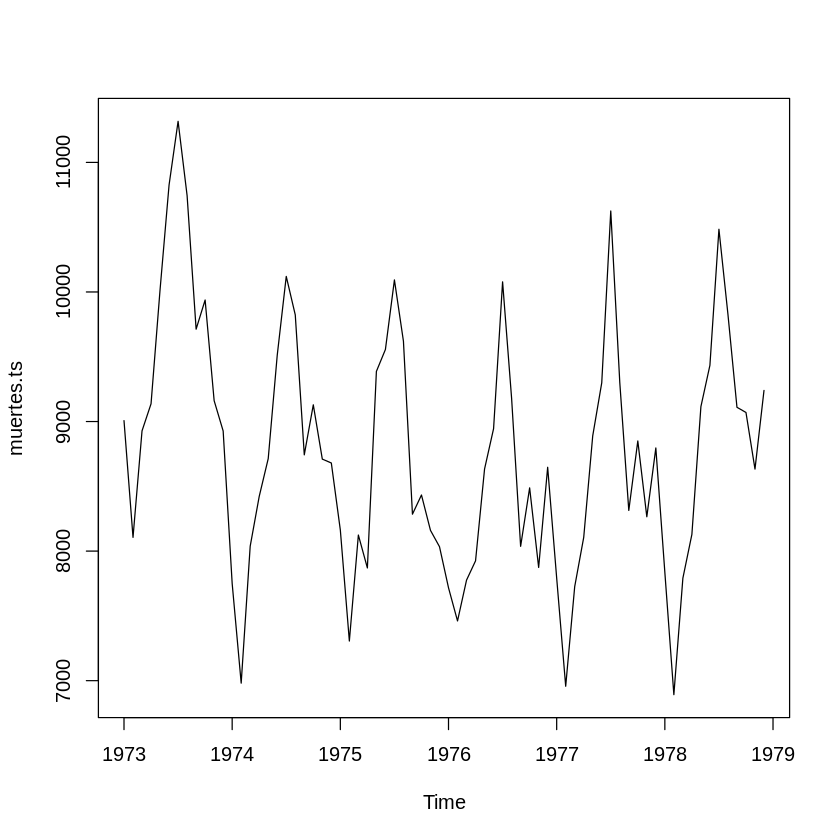

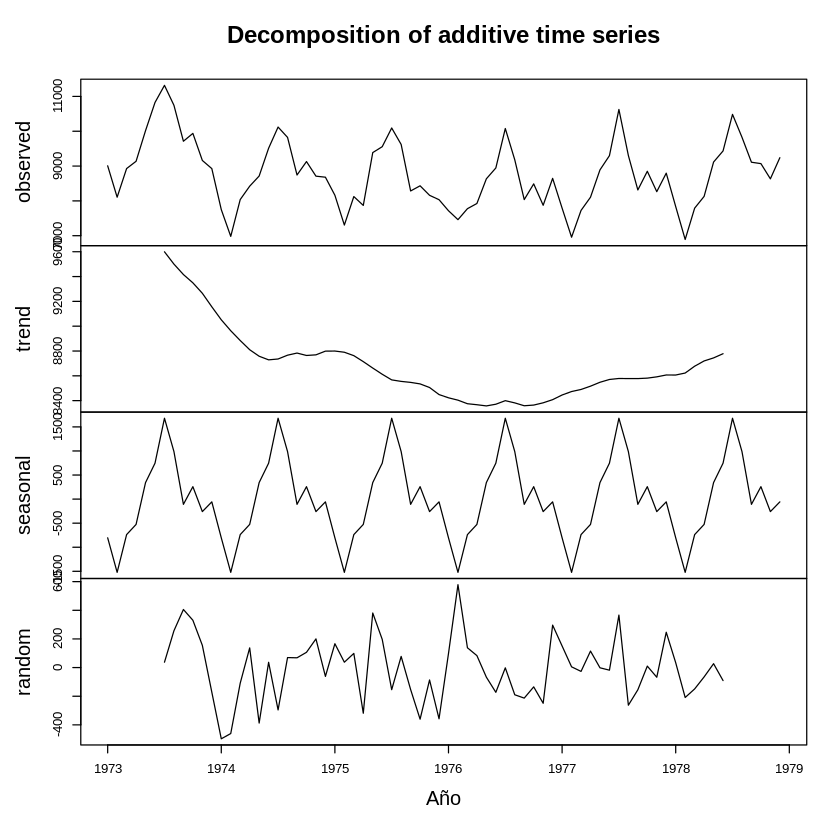

In [183]:
muertes.ts = ts(deaths$V2, start = c(1973,1), frequency = 12)
print(muertes.ts)
plot(muertes.ts)

muertes.ts.desc = decompose(muertes.ts)
plot(muertes.ts.desc, xlab='Año')

In [184]:
muertes.ts.desc$figure

[1]  -804.31944 -1521.73611  -737.46944  -525.81111   343.42222   746.41389
 [7]  1679.96389   986.83889  -108.76944   258.30556  -259.37778   -57.46111

In [243]:
muertes.ts.desc

$x
       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1973  9007  8106  8928  9137 10017 10826 11317 10744  9713  9938  9161  8927
1974  7750  6981  8038  8422  8714  9512 10120  9823  8743  9129  8710  8680
1975  8162  7306  8124  7870  9387  9556 10093  9620  8285  8433  8160  8034
1976  7717  7461  7776  7925  8634  8945 10078  9179  8037  8488  7874  8647
1977  7792  6957  7726  8106  8890  9299 10625  9302  8314  8850  8265  8796
1978  7836  6892  7791  8129  9115  9434 10484  9827  9110  9070  8633  9240

$seasonal
             Jan         Feb         Mar         Apr         May         Jun
1973  -804.31944 -1521.73611  -737.46944  -525.81111   343.42222   746.41389
1974  -804.31944 -1521.73611  -737.46944  -525.81111   343.42222   746.41389
1975  -804.31944 -1521.73611  -737.46944  -525.81111   343.42222   746.41389
1976  -804.31944 -1521.73611  -737.46944  -525.81111   343.42222   746.41389
1977  -804.31944 -1521.73611  -737.46944  -525.81111   343.422

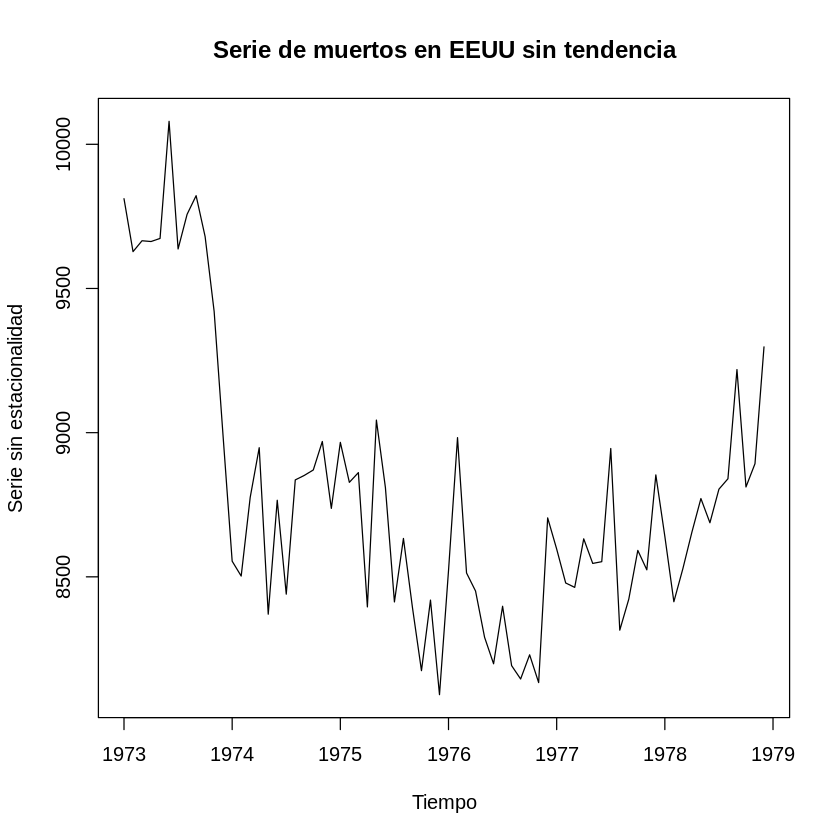

In [175]:
muertes_des<-muertes.ts.desc$x-muertes.ts.desc$seasonal
plot(muertes.ts.desc$x-muertes.ts.desc$seasonal,xlab='Tiempo',ylab='Serie sin estacionalidad',main='Serie de muertos en EEUU sin tendencia')
muertes_des_2<-(muertes_des)^(2)

In [178]:
regresion <- lm(muertes.ts.desc$trend ~ muertes_des+muertes_des_2)
summary(regresion)
regresion

In [275]:
x=muertes.ts.desc$random
dif1.x=diff(x)
dif12.dif1.x = diff(dif1.x, lag=12)

In [276]:
y = dif12.dif1.x
y
y<-y[!is.na(y)]
y

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1974,,NA,NA,NA,NA,NA,NA,146.041667,-150.083333,113.541667,268.875000,65.083333
1975,553.666667,-165.666667,-290.250000,-664.041667,1224.416667,-608.250000,-18.666667,-133.208333,-229.833333,-245.208333,180.125000,-9.291667
1976,227.791667,609.416667,-501.833333,362.958333,-850.291667,78.541667,521.875000,-420.208333,208.041667,285.333333,-388.291667,816.750000
1977,-601.625000,-625.916667,408.625000,196.333333,34.000000,89.125000,213.625000,-441.000000,130.916667,86.791667,36.875000,-231.583333
1978,-67.208333,-97.083333,91.625000,-57.708333,208.875000,-101.333333,NA,NA,NA,NA,NA,NA


[1]  146.041667 -150.083333  113.541667  268.875000   65.083333  553.666667
 [7] -165.666667 -290.250000 -664.041667 1224.416667 -608.250000  -18.666667
[13] -133.208333 -229.833333 -245.208333  180.125000   -9.291667  227.791667
[19]  609.416667 -501.833333  362.958333 -850.291667   78.541667  521.875000
[25] -420.208333  208.041667  285.333333 -388.291667  816.750000 -601.625000
[31] -625.916667  408.625000  196.333333   34.000000   89.125000  213.625000
[37] -441.000000  130.916667   86.791667   36.875000 -231.583333  -67.208333
[43]  -97.083333   91.625000  -57.708333  208.875000 -101.333333

In [278]:
acf(y, plot=FALSE)


Autocorrelations of series ‘y’, by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.424 -0.026  0.067 -0.176  0.002  0.159 -0.158  0.059  0.102 -0.153 
    11     12     13     14     15     16 
 0.165 -0.229  0.083  0.070 -0.024 -0.064 

In [291]:
aux=1
pred=c ( )
for(i in (73:84)) {
if (aux==13) 
    aux=1
    pred = c(pred,22440+3.684*i+2.414∗(i)ˆ2+serie$figure[aux])
aux=aux+1
}
pred

ERROR: Error in parse(text = x, srcfile = src): <text>:6:38: unexpected input
5:     aux=1
6:     pred = c(pred,22440+3.684*i+2.414<e2>
                                        ^


In [288]:
2*3

[1] 6

Time Series:
Start = 1972 
End = 2018 
Frequency = 1 
 [1] 26727 23480 18356 16602 17716 19638 19623 21506 25606 33536 55272 47889
[13] 39207 30751 35268 32790 34226 37217 39479 40368 43402 44837 44236 50790
[25] 57775 52394 49890 47052 40926 44831 41734 44450 46620 46328 44839 53682
[37] 57087 56330 57746 62834 61791 73276 78445 79880 91711 94879 89311


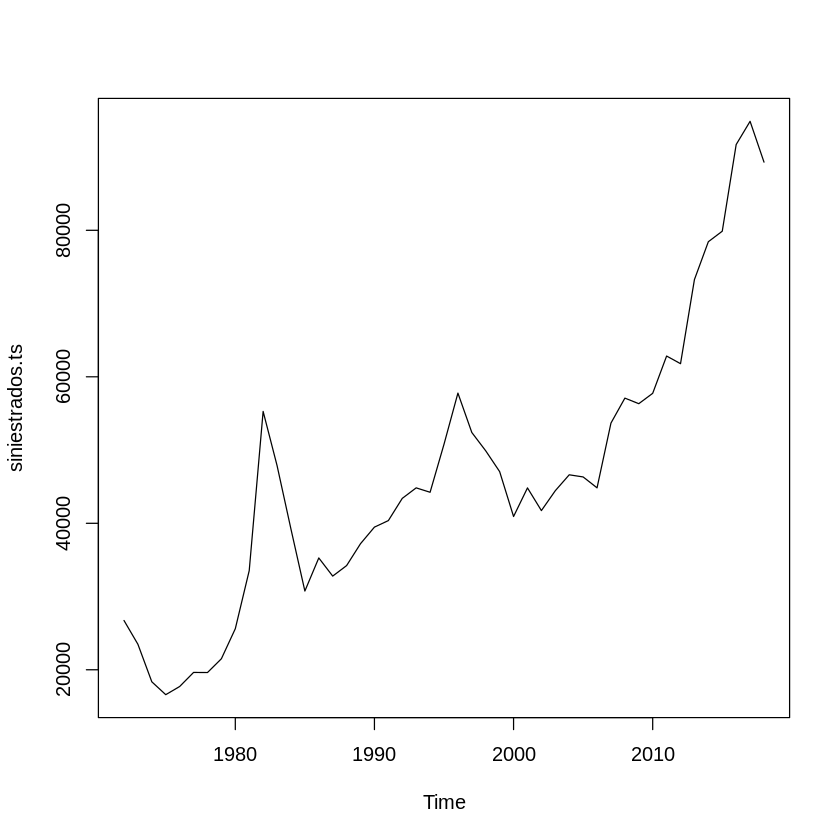

In [119]:
siniestrados.ts = ts(siniestrados$Siniestros, start = c(1972))
print(siniestrados.ts)
plot(siniestrados.ts)

In [112]:
siniestrados.ts.desc = decompose(siniestrados.ts)
plot(siniestrados.ts.desc, xlab='Año')

Warning message:
“Removed 2 rows containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_path).”
Warning message:
“Removed 6 rows containing missing values (geom_path).”
Warning message:
“Removed 8 rows containing missing values (geom_path).”


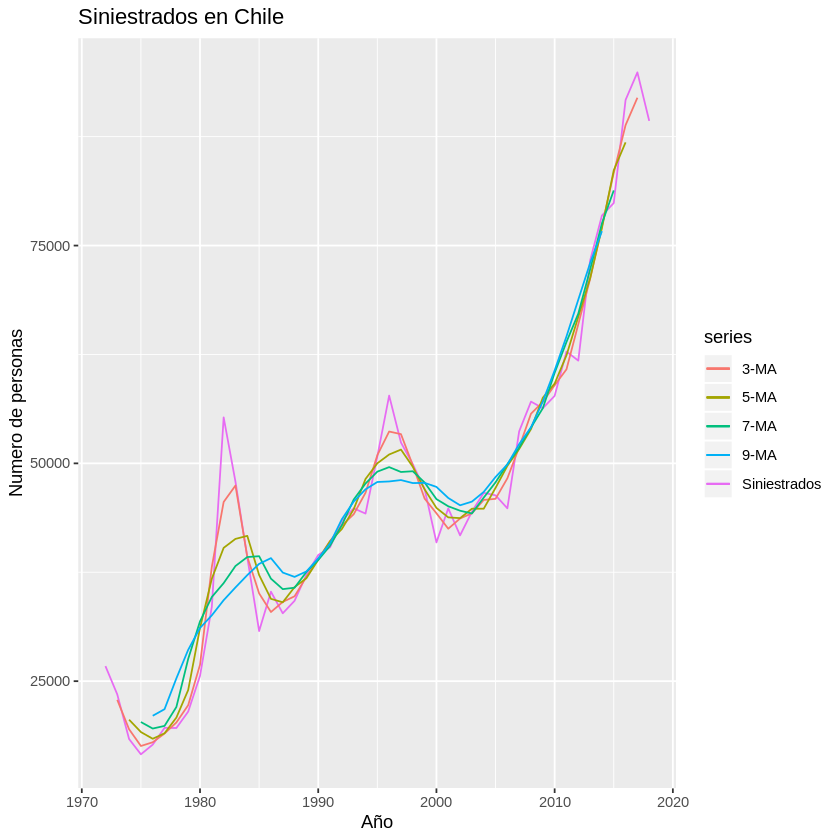

In [145]:
autoplot(siniestrados.ts,series="Siniestrados") +
autolayer(ma(siniestrados.ts, 3),series="3-MA") +
autolayer(ma(siniestrados.ts, 5),series="5-MA") +
autolayer(ma(siniestrados.ts, 7),series="7-MA") +
autolayer(ma(siniestrados.ts, 9),series="9-MA") +
xlab("Año")+ylab("Numero de personas")+
ggtitle("Siniestrados en Chile") 

Warning message:
“Removed 2 rows containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_path).”


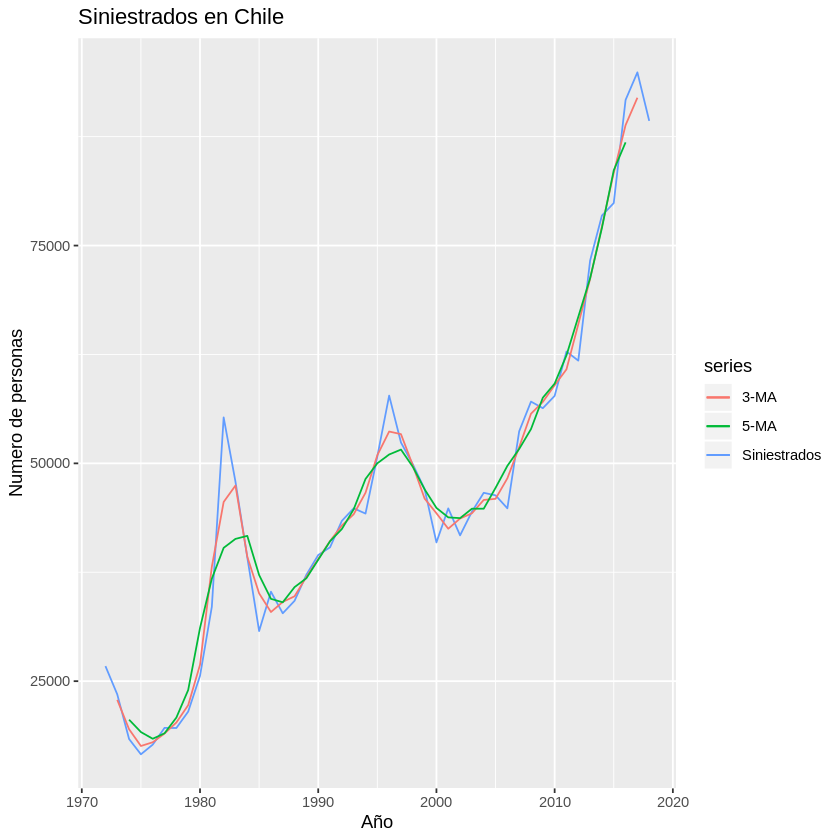

Warning message:
“Removed 6 rows containing missing values (geom_path).”


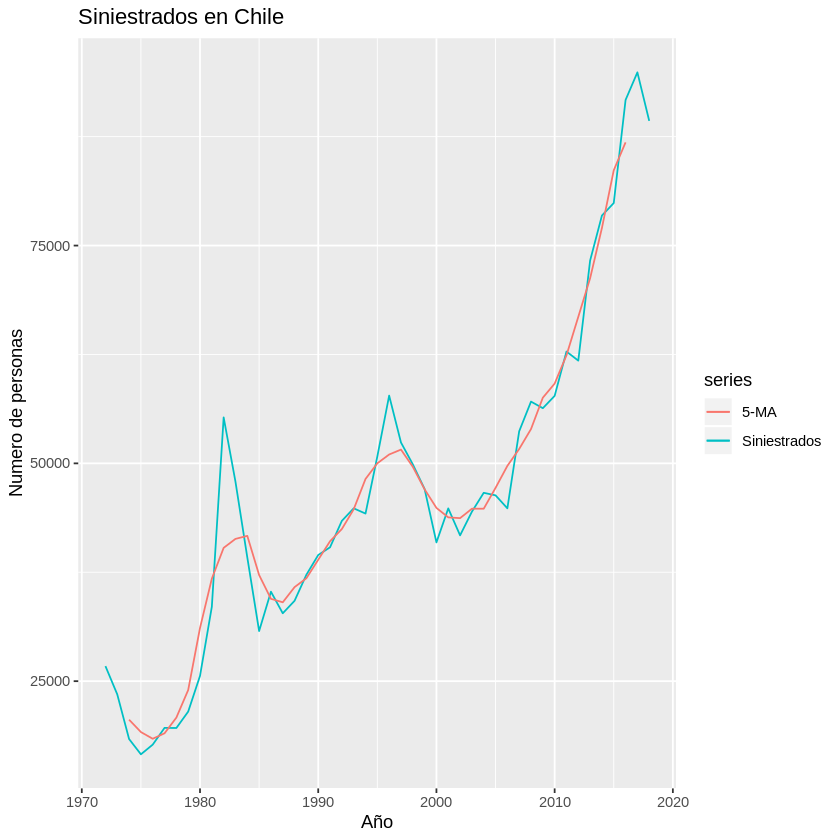

Warning message:
“Removed 8 rows containing missing values (geom_path).”


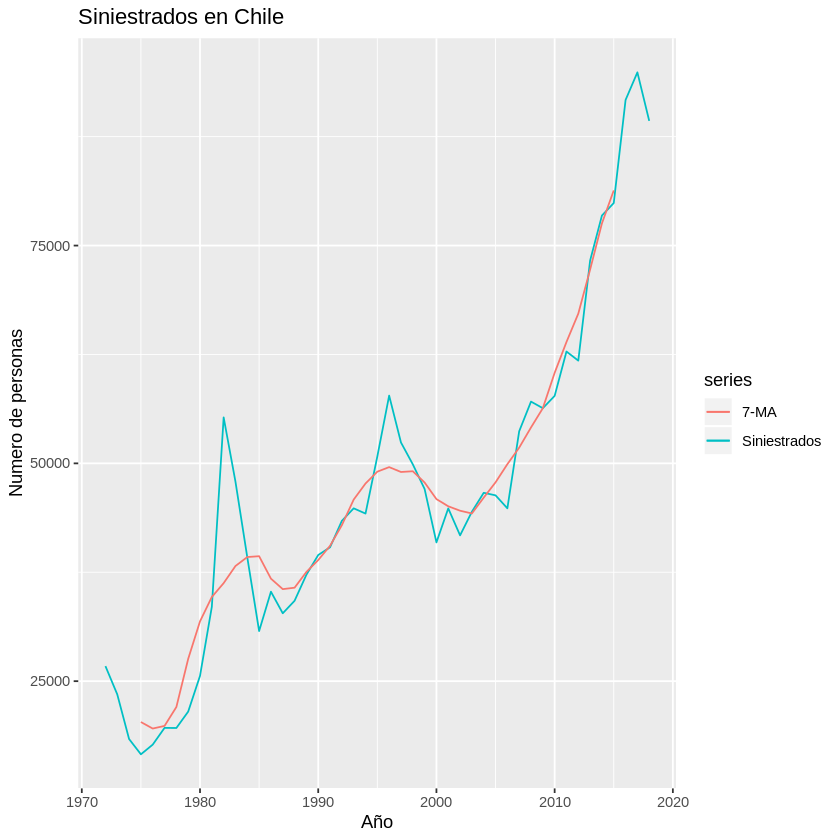

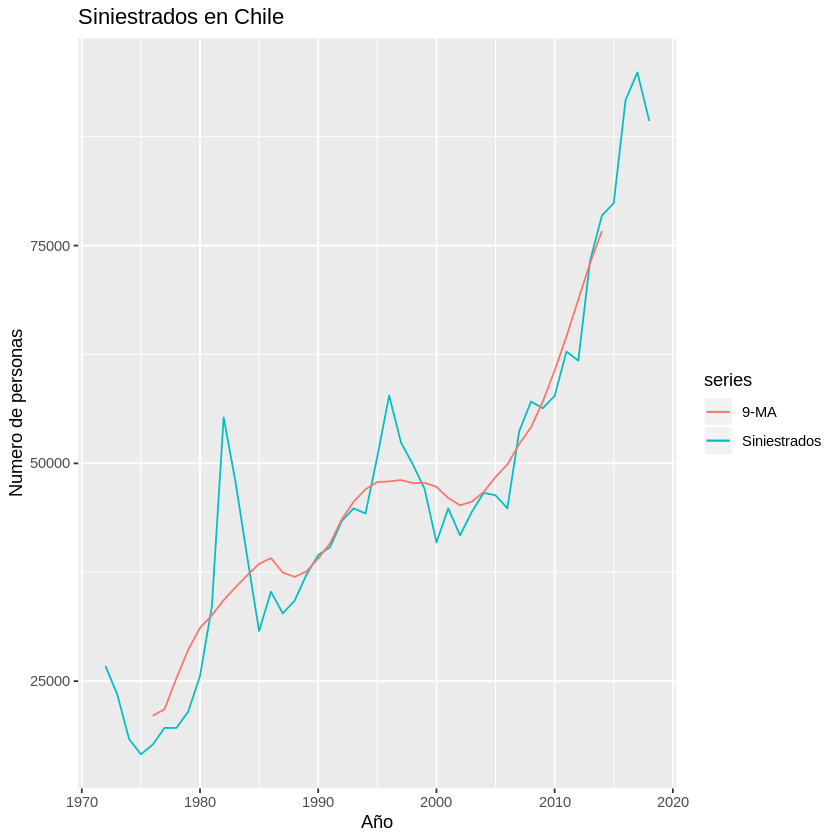

In [144]:
autoplot(siniestrados.ts,series="Siniestrados") +
autolayer(ma(siniestrados.ts, 5),series="5-MA") +
xlab("Año")+ylab("Numero de personas")+
ggtitle("Siniestrados en Chile") 
autoplot(siniestrados.ts,series="Siniestrados") +
autolayer(ma(siniestrados.ts, 7),series="7-MA") +
xlab("Año")+ylab("Numero de personas")+
ggtitle("Siniestrados en Chile") 
autoplot(siniestrados.ts,series="Siniestrados") +
autolayer(ma(siniestrados.ts, 9),series="9-MA") +
xlab("Año")+ylab("Numero de personas")+
ggtitle("Siniestrados en Chile") 

In [138]:
fallecidos.ts = ts(siniestrados$Fallecidos, start = c(1972))

Warning message:
“Removed 2 rows containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_path).”
Warning message:
“Removed 6 rows containing missing values (geom_path).”
Warning message:
“Removed 8 rows containing missing values (geom_path).”


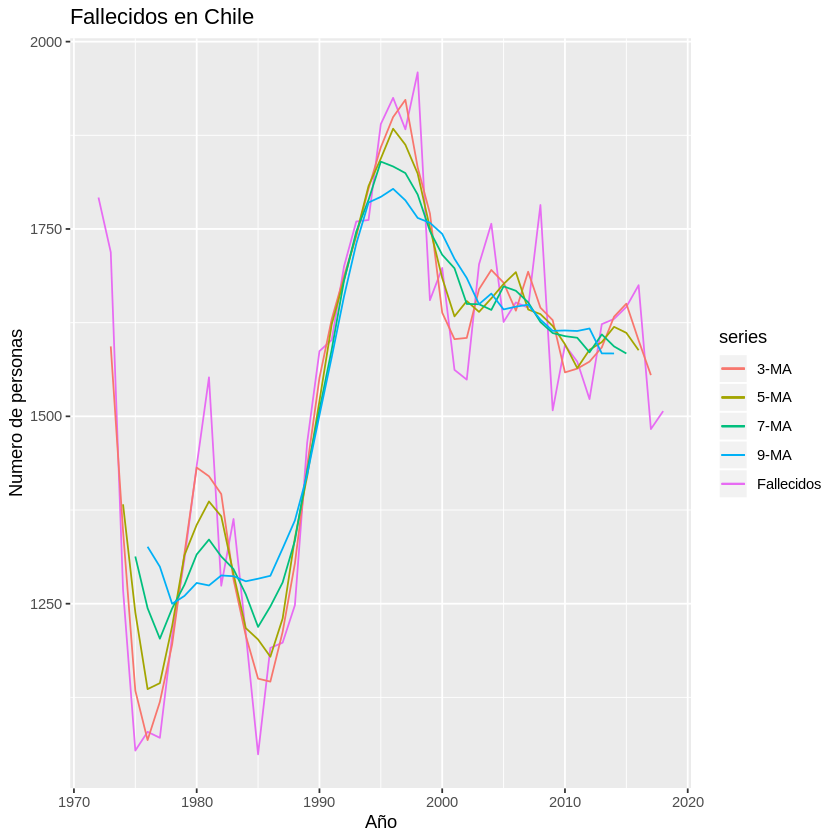

In [146]:
autoplot(fallecidos.ts,series="Fallecidos") +
autolayer(ma(fallecidos.ts, 3),series="3-MA") +
autolayer(ma(fallecidos.ts, 5),series="5-MA") +
autolayer(ma(fallecidos.ts, 7),series="7-MA") +
autolayer(ma(fallecidos.ts, 9),series="9-MA") +
xlab("Año")+ylab("Numero de personas")+
ggtitle("Fallecidos en Chile") 

Warning message:
“Removed 2 rows containing missing values (geom_path).”
Warning message:
“Removed 4 rows containing missing values (geom_path).”


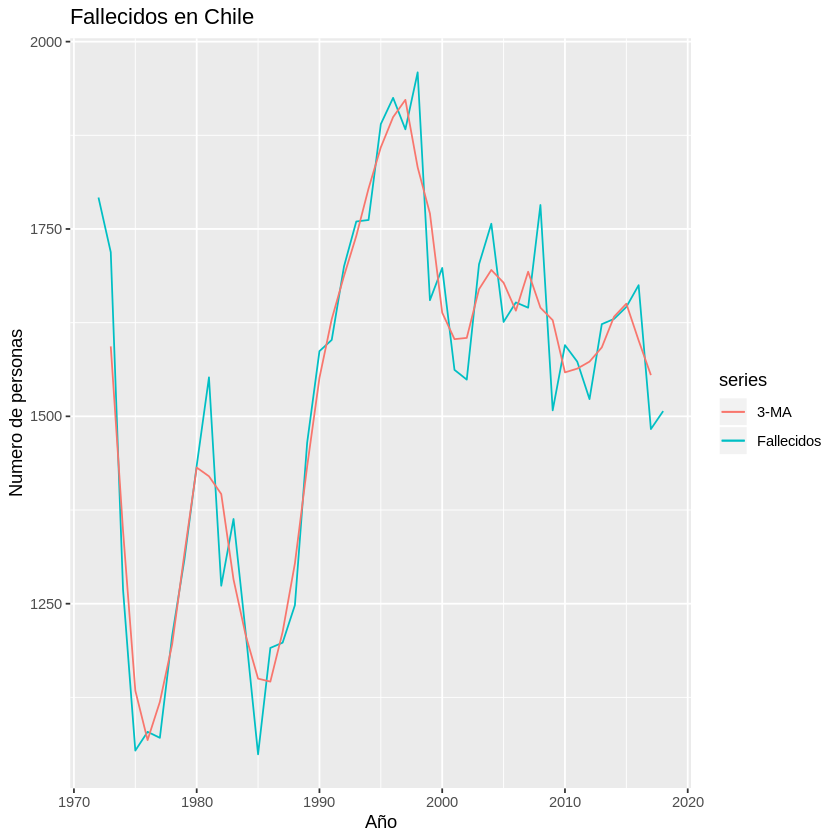

Warning message:
“Removed 6 rows containing missing values (geom_path).”


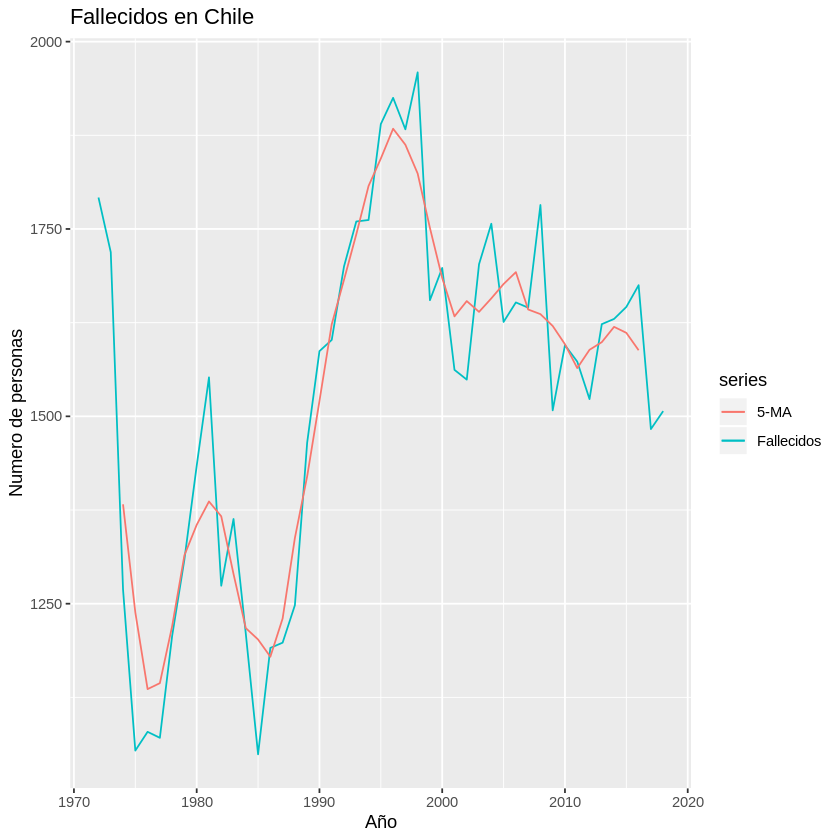

Warning message:
“Removed 8 rows containing missing values (geom_path).”


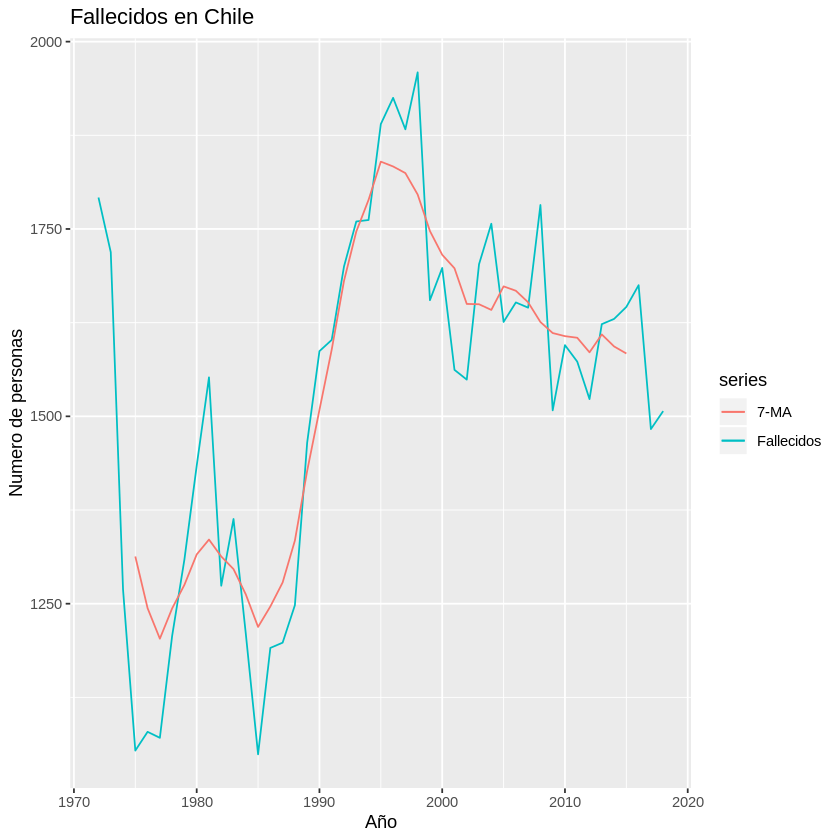

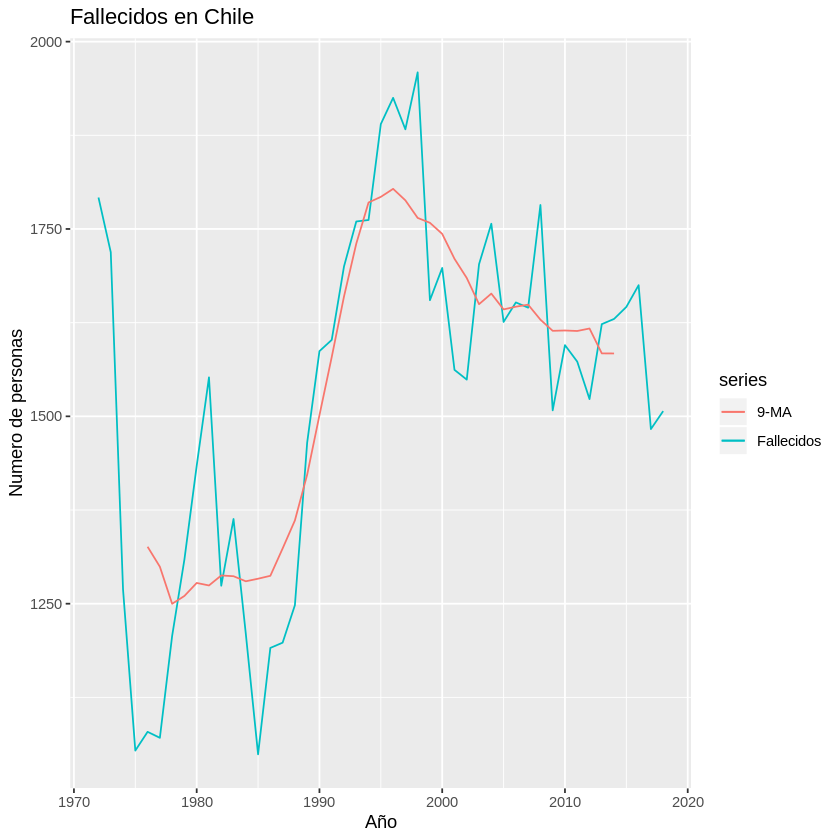

In [143]:
autoplot(fallecidos.ts,series="Fallecidos") +
autolayer(ma(fallecidos.ts, 5),series="5-MA") +
xlab("Año")+ylab("Numero de personas")+
ggtitle("Fallecidos en Chile") 
autoplot(fallecidos.ts,series="Fallecidos") +
autolayer(ma(fallecidos.ts, 7),series="7-MA") +
xlab("Año")+ylab("Numero de personas")+
ggtitle("Fallecidos en Chile") 
autoplot(fallecidos.ts,series="Fallecidos") +
autolayer(ma(fallecidos.ts, 9),series="9-MA") +
xlab("Año")+ylab("Numero de personas")+
ggtitle("Fallecidos en Chile") 

Warning message:
“Removed 8 rows containing missing values (geom_path).”


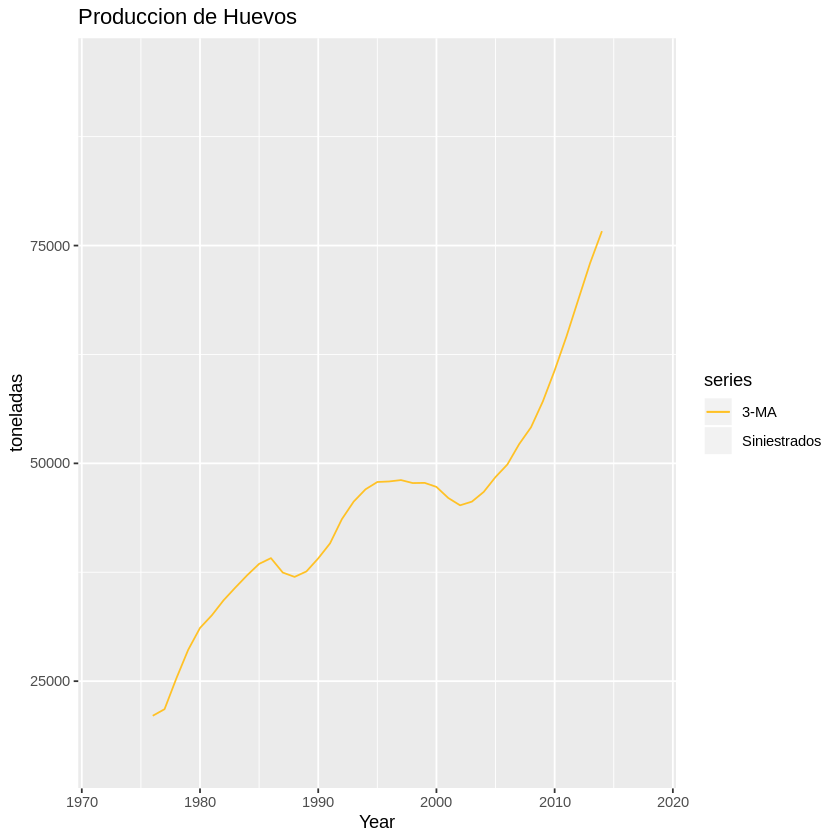

In [131]:
autoplot(siniestrados.ts,series="Siniestrados") +
autolayer(ma(siniestrados.ts, 5),series="3-MA") +
xlab("Year")+ylab("toneladas")+
ggtitle("Produccion de Huevos") + scale_color_manual(values=c("Huevos"="chocolate2" ,"3-MA"="goldenrod1"))

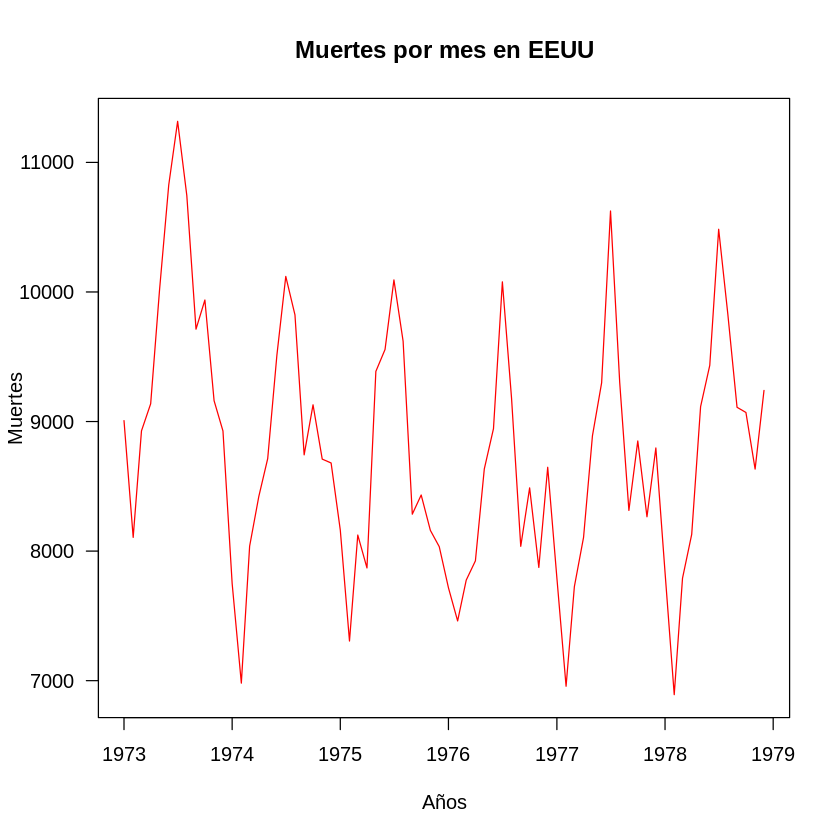

In [91]:
plot(nfecha1, cbind(deaths$V2),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Muertes',main='Muertes por mes en EEUU',las=1)

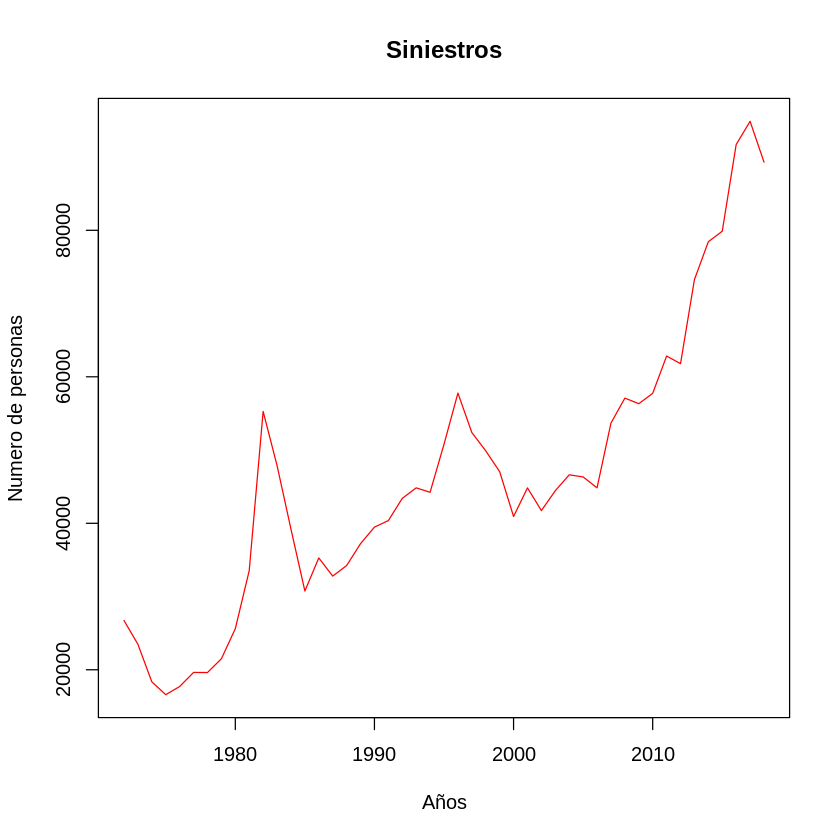

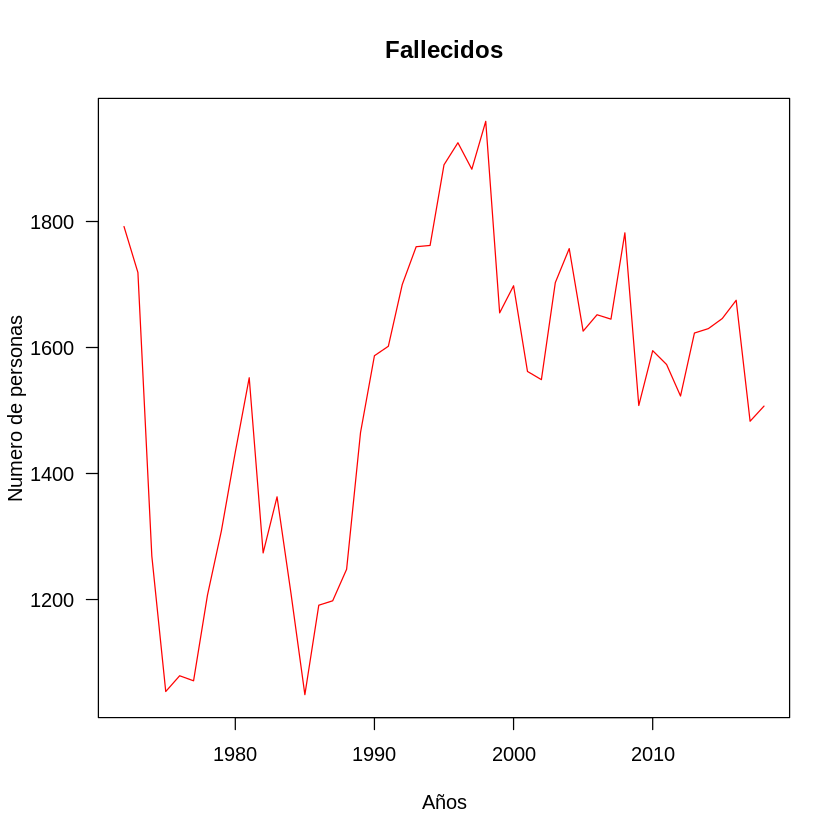

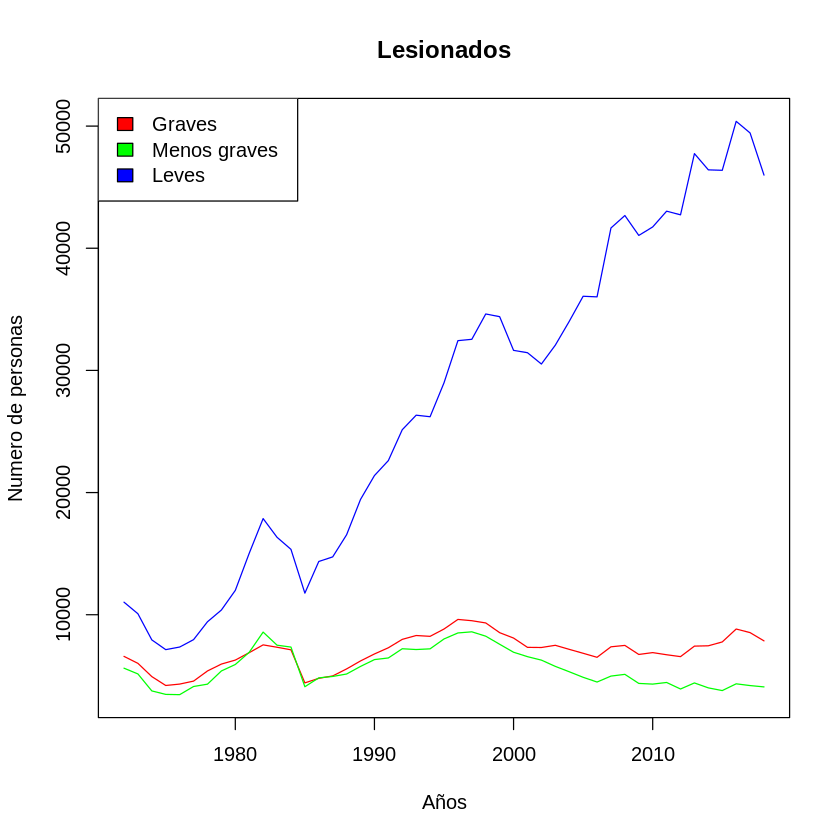

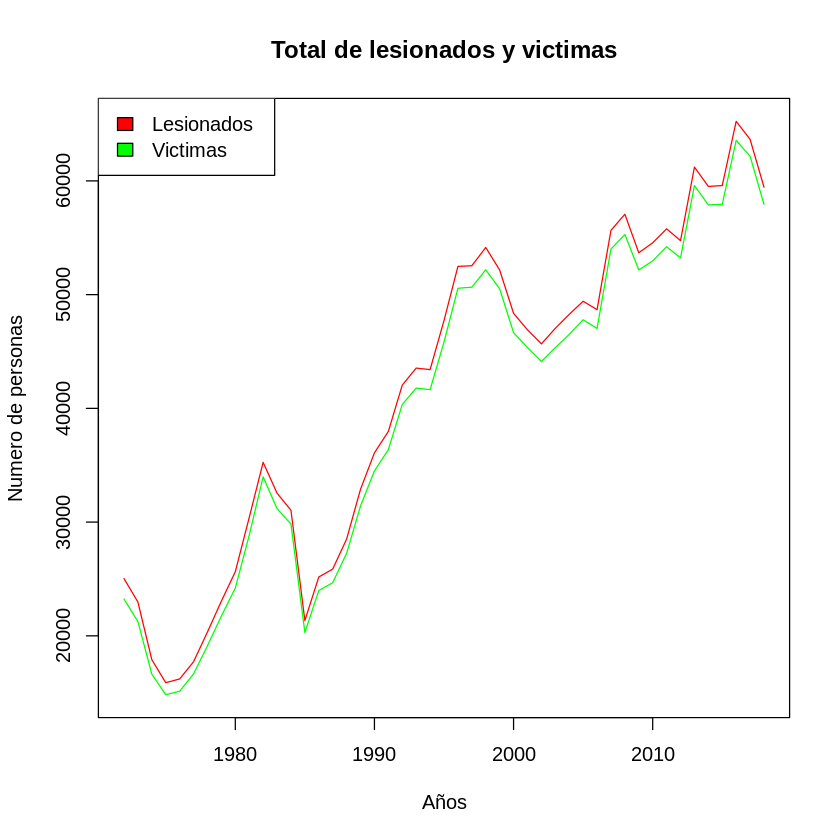

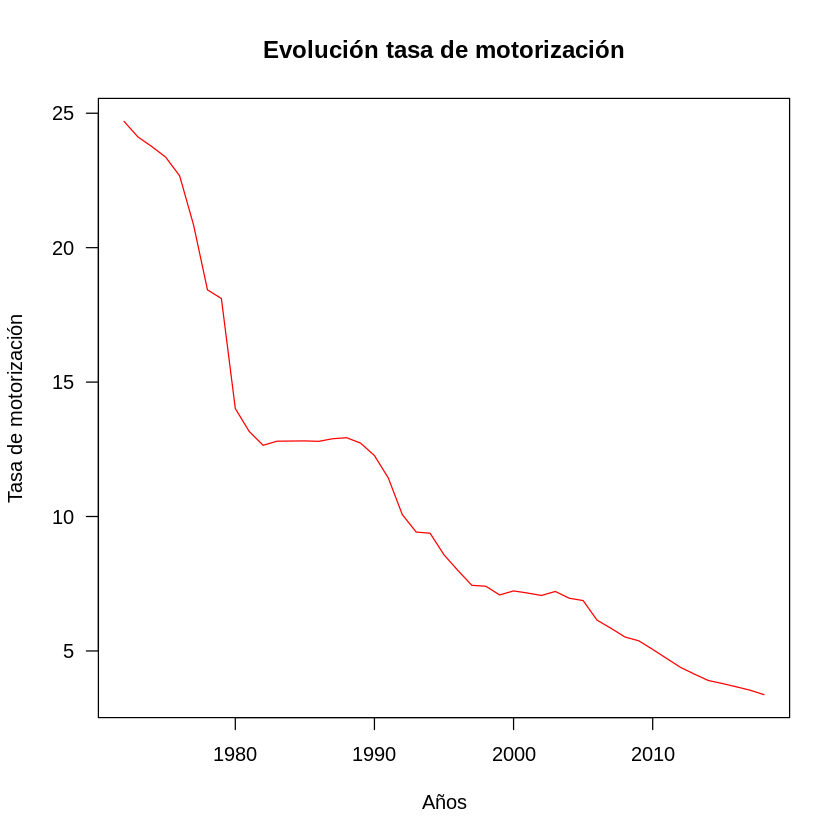

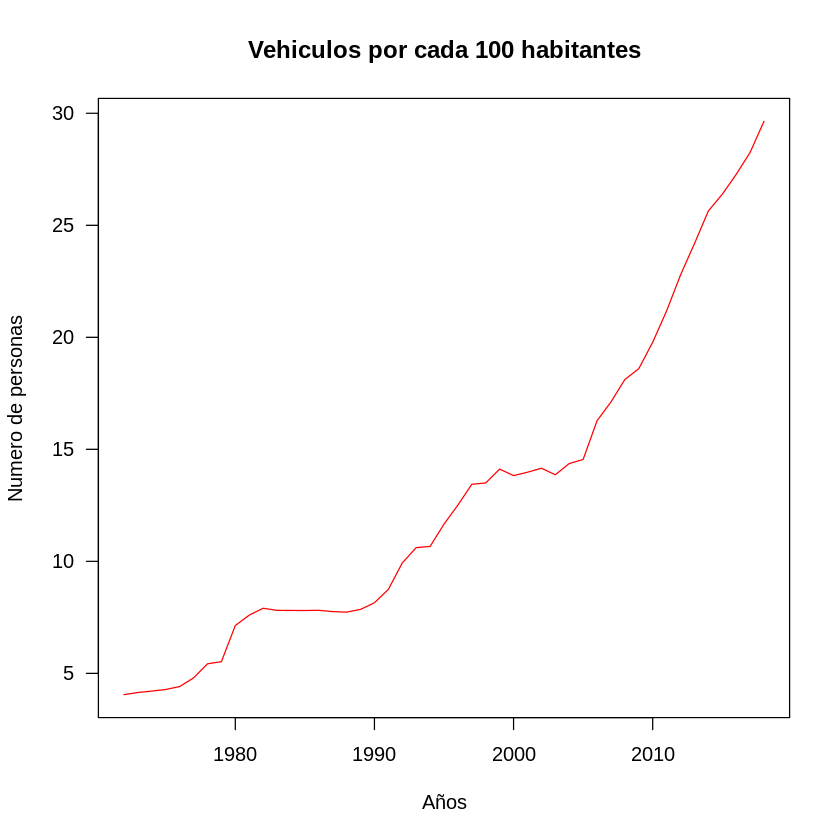

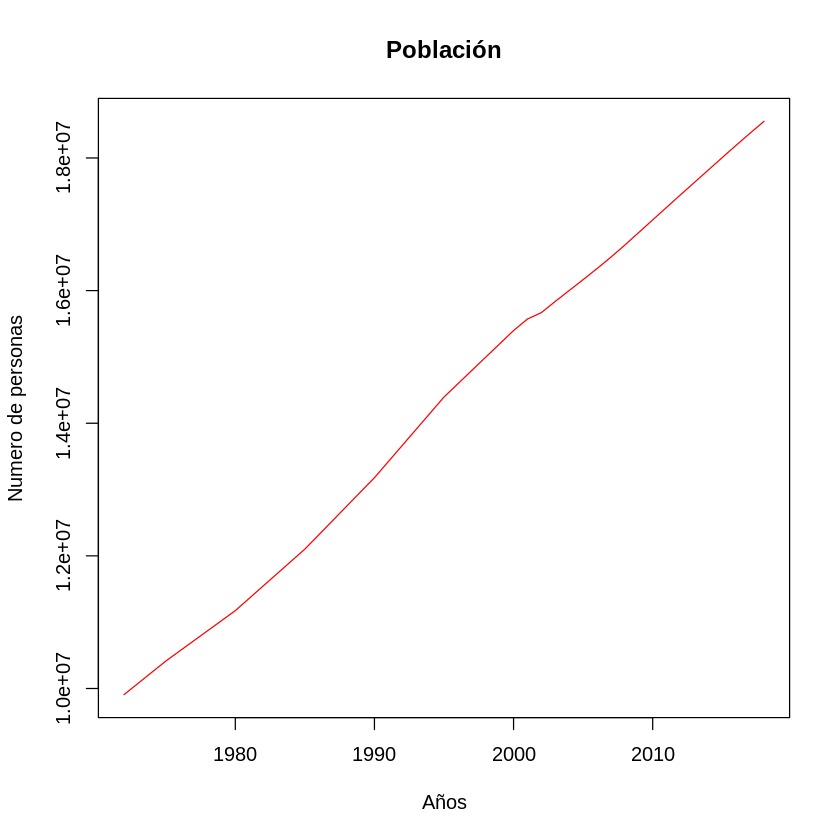

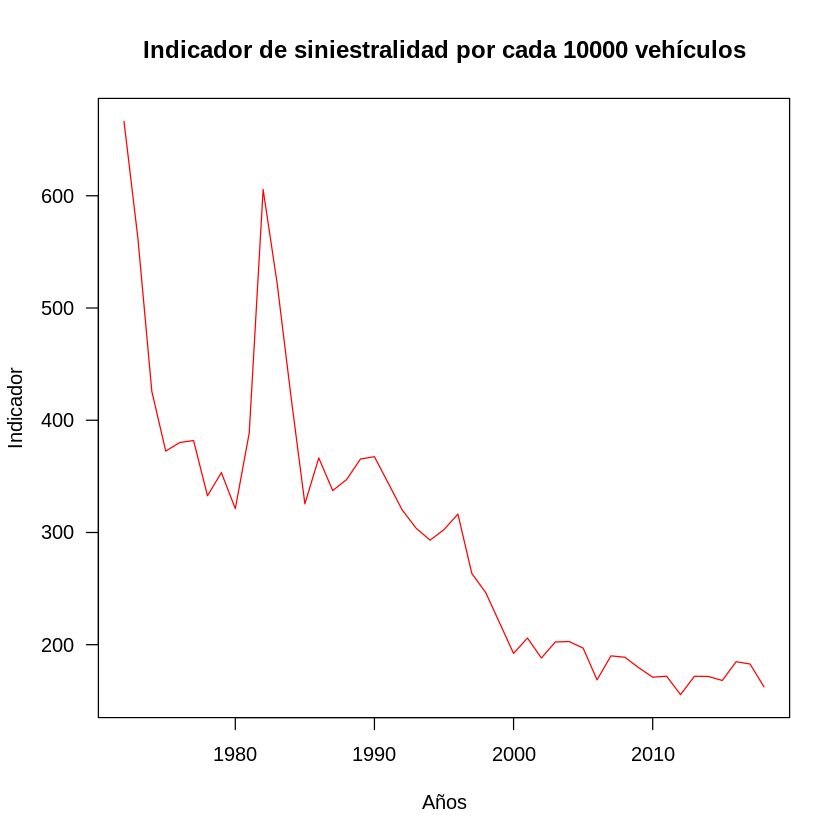

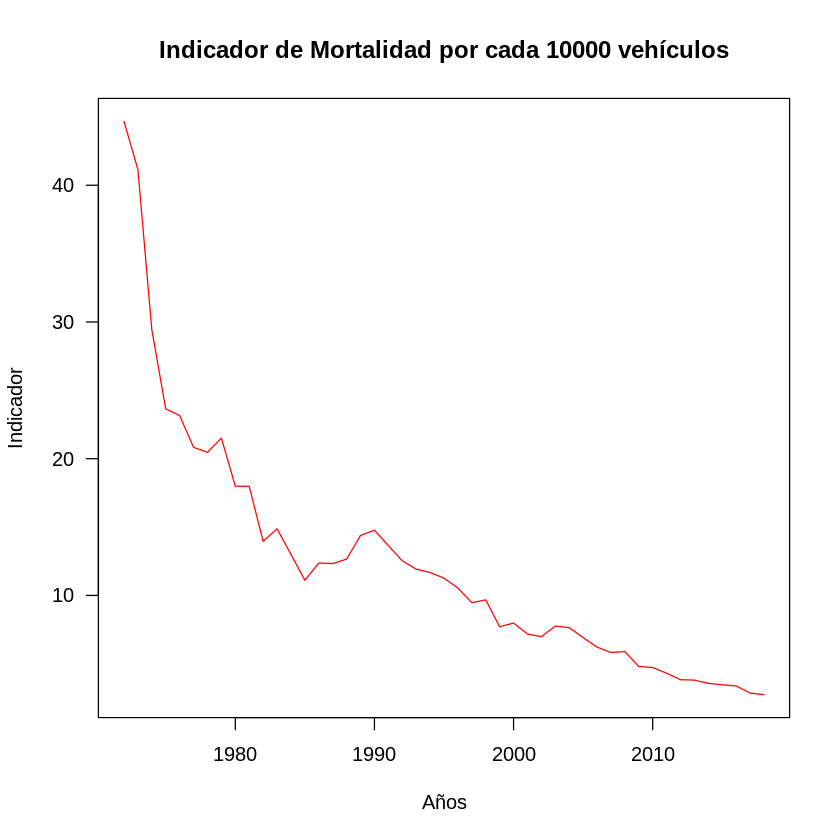

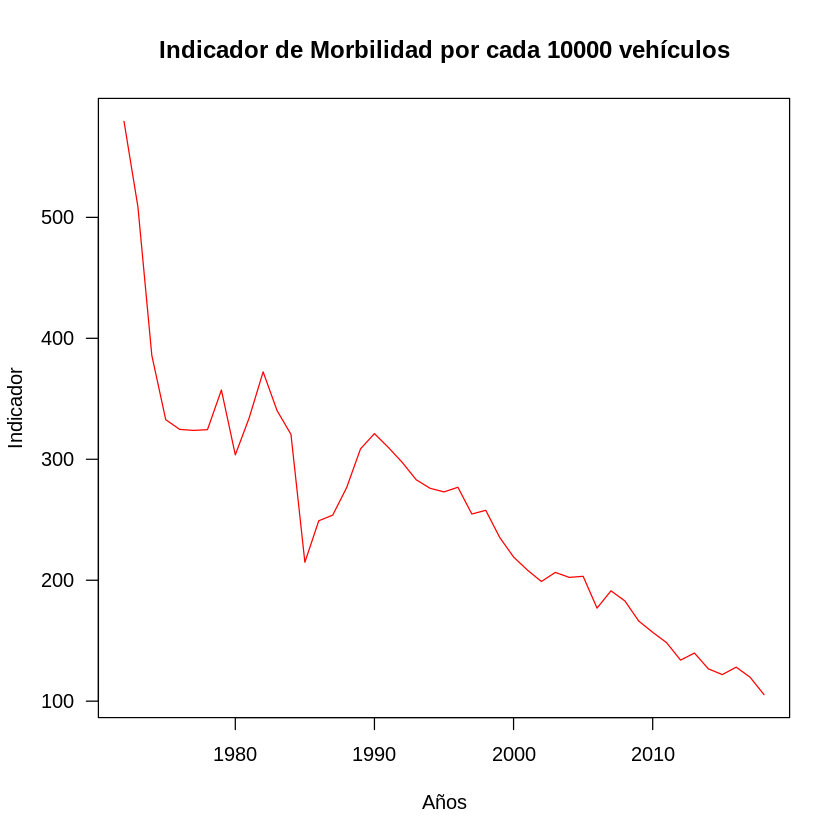

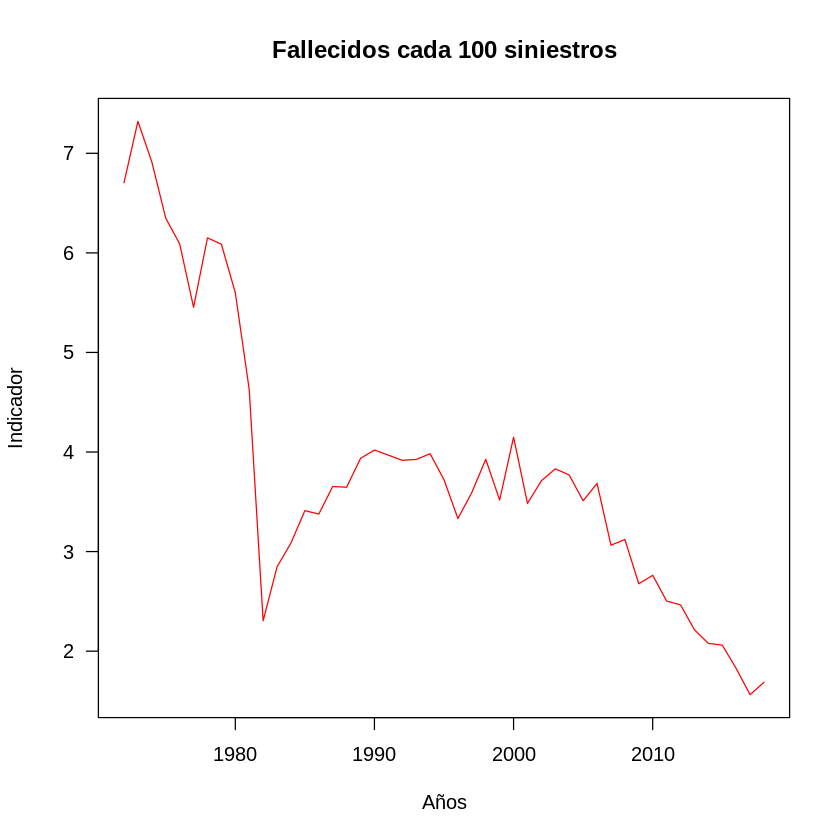

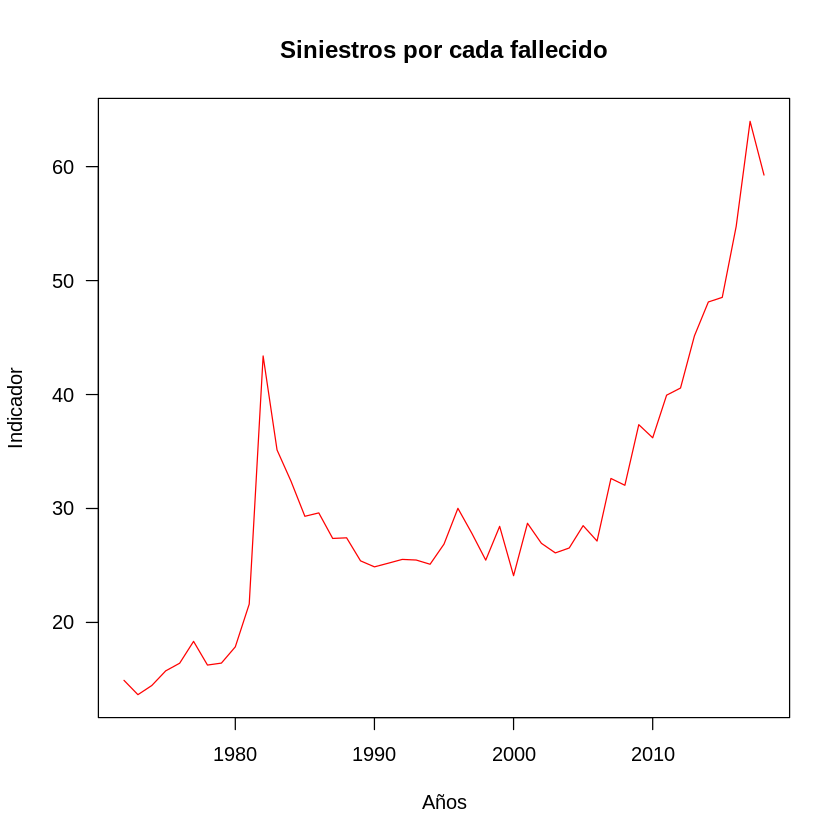

In [65]:
matplot(siniestrados$Año, cbind(siniestrados$Siniestros),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Numero de personas',main='Siniestros')

matplot(siniestrados$Año, cbind(siniestrados$Fallecidos),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Numero de personas',main='Fallecidos',las=1)

matplot(siniestrados$Año, cbind(siniestrados$Lesionados_Graves,siniestrados$Lesionados_Menos_graves,siniestrados$Lesionados_Leves),type="l",col=c("red","green", "blue"),lty=c(1,1),xlab='Años',ylab='Numero de personas',main='Lesionados')
legend(x = 'topleft', legend = c("Graves", "Menos graves", "Leves"), fill = c("red", "green","blue"))

matplot(siniestrados$Año, cbind(siniestrados$Total_víctimas,siniestrados$Total_lesionados),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Numero de personas',main='Total de lesionados y victimas')
legend(x = 'topleft', legend = c("Lesionados", "Victimas"), fill = c("red", "green"))

matplot(siniestrados$Año, cbind(siniestrados$Tasa_motorización),type="l",col=c("red"),lty=c(1,1),xlab='Años',ylab='Tasa de motorización',main='Evolución tasa de motorización',las=1)

matplot(siniestrados$Año, cbind(siniestrados$Vehículos_cada_100_habitantes),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Numero de personas',main='Vehiculos por cada 100 habitantes',las=1)

matplot(siniestrados$Año, cbind(siniestrados$Población),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Numero de personas',main='Población')

matplot(siniestrados$Año, cbind(siniestrados$Indicadores_cada_10000_vehículos_Siniestralidad),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Indicador',main='Indicador de siniestralidad por cada 10000 vehículos',las=1)

matplot(siniestrados$Año, cbind(siniestrados$Indicadores_cada_10000_vehículos_Mortalidad),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Indicador',main='Indicador de Mortalidad por cada 10000 vehículos',las=1)

matplot(siniestrados$Año, cbind(siniestrados$Indicadores_cada_10000_vehículos_Morbilidad),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Indicador',main='Indicador de Morbilidad por cada 10000 vehículos',las=1)

matplot(siniestrados$Año, cbind(siniestrados$Fallecidos_cada_100_siniestros),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Indicador',main='Fallecidos cada 100 siniestros',las=1)

matplot(siniestrados$Año, cbind(siniestrados$Siniestros_por_cada_fallecido),type="l",col=c("red","green"),lty=c(1,1),xlab='Años',ylab='Indicador',main='Siniestros por cada fallecido',las=1)
